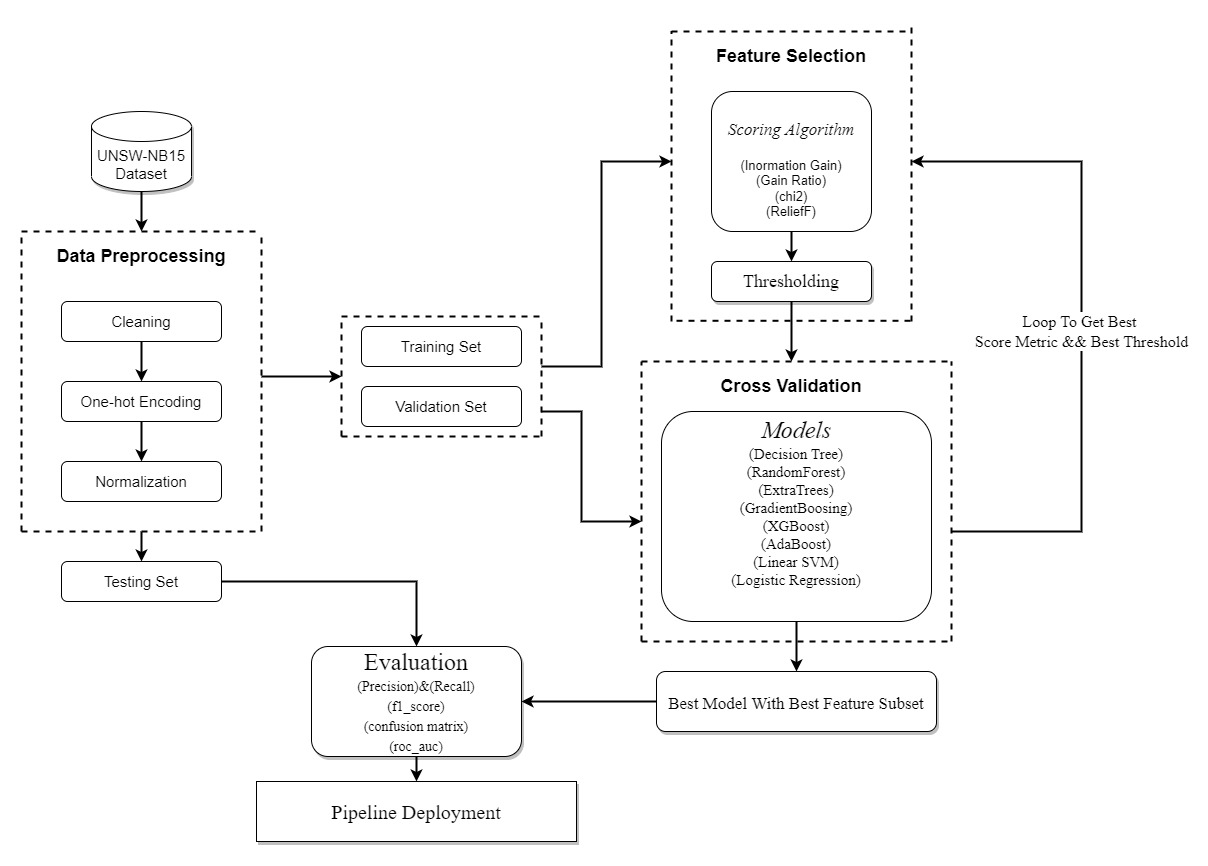

In [27]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [28]:
des = pd.read_csv("UNSW_NB15/NUSW-NB15_features.csv", encoding= 'unicode_escape')
des

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [29]:
df = pd.read_csv("UNSW_NB15/UNSW_NB15_training-set.csv")
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [30]:
df_original = df.copy()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [32]:
df = df.drop(columns=['id', 'attack_cat'], axis=1)

In [33]:
df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


##### 0 for normal and 1 for attack records

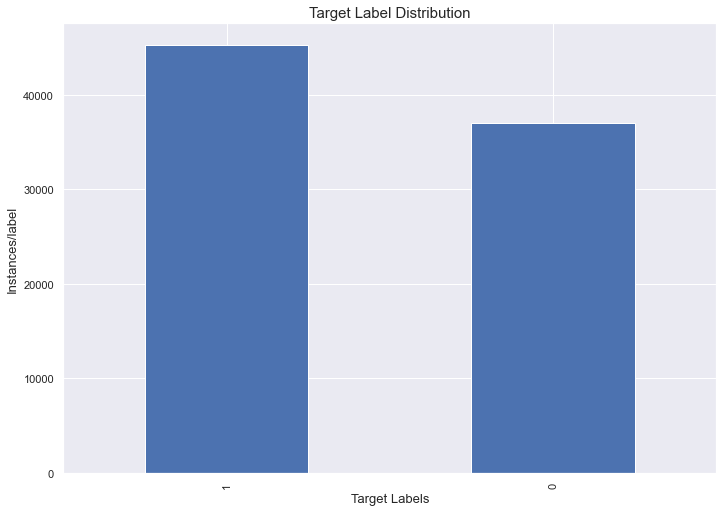

In [34]:
df['label'].value_counts().plot(kind='bar')
plt.title("Target Label Distribution", fontsize=15)
plt.xlabel("Target Labels", fontsize=13)
plt.ylabel("Instances/label", fontsize=13)
plt.show()
# dist

## Reduce the labels in catagorical features

In [35]:
df['proto'].value_counts()

tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: proto, Length: 131, dtype: int64

In [36]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   proto    82332 non-null  object
 1   service  82332 non-null  object
 2   state    82332 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [37]:
df_cat.describe(include='all')
#one-hot1

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [38]:
# service-bar

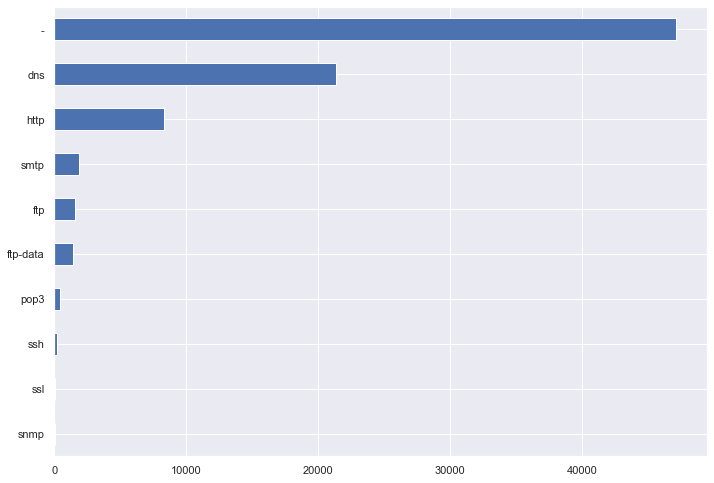

In [39]:
df_cat['service'].value_counts().head(10).plot(kind='barh').invert_yaxis()

In [40]:
# state-bar

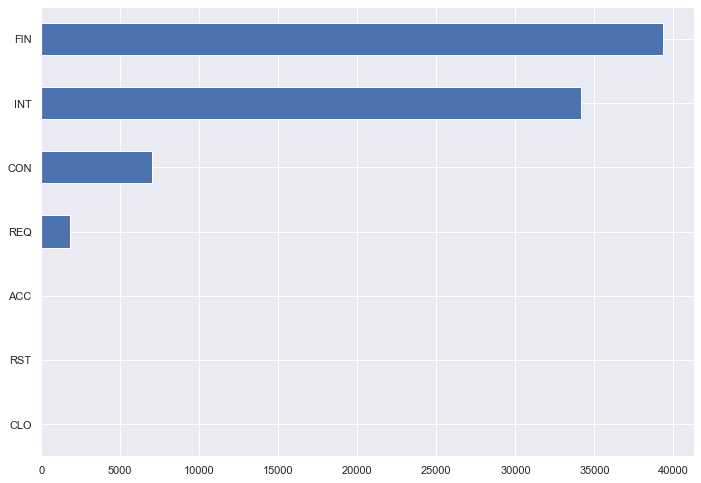

In [41]:
df_cat['state'].value_counts().head(10).plot(kind='barh').invert_yaxis()

In [42]:
#proto-bar

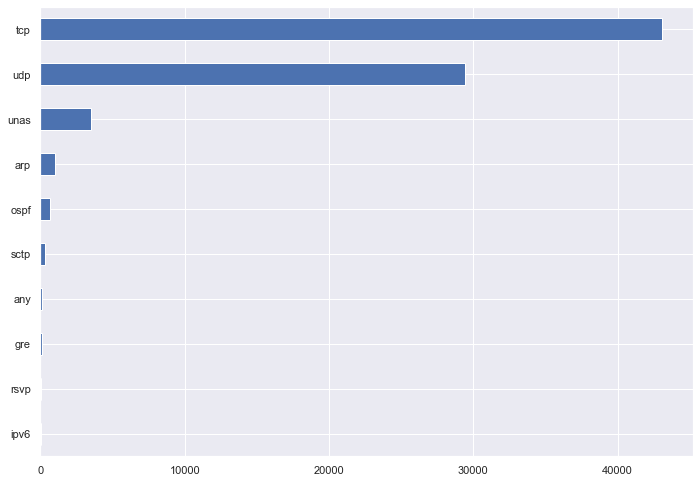

In [43]:
df_cat['proto'].value_counts().head(10).plot(kind='barh').invert_yaxis()

In [44]:
# occ-dist

In [45]:
n_features = [2, 2, 2]
for feature, num in zip(df_cat.columns, n_features):
    #print(num)
    if df_original[feature].nunique()>num:
        where_condition = df_original[feature].isin(df_original[feature].value_counts().head(num).index)
        percent = where_condition.sum()/df_original.shape[0]
        print(f"Feature Name {feature}")
        print(f"Top {num} Features occupy {round(percent*100,2)}% of the data")
        df[feature] = np.where(where_condition,
                               df_original[feature], "OTHER")

Feature Name proto
Top 2 Features occupy 88.07% of the data
Feature Name service
Top 2 Features occupy 83.22% of the data
Feature Name state
Top 2 Features occupy 89.28% of the data


In [46]:
df.select_dtypes(exclude=[np.number]).describe()
#aff-dist

,proto,service,state
count,82332,82332,82332
unique,3,3,3
top,tcp,-,FIN
freq,43095,47153,39339


In [47]:
# aff-proto-bar

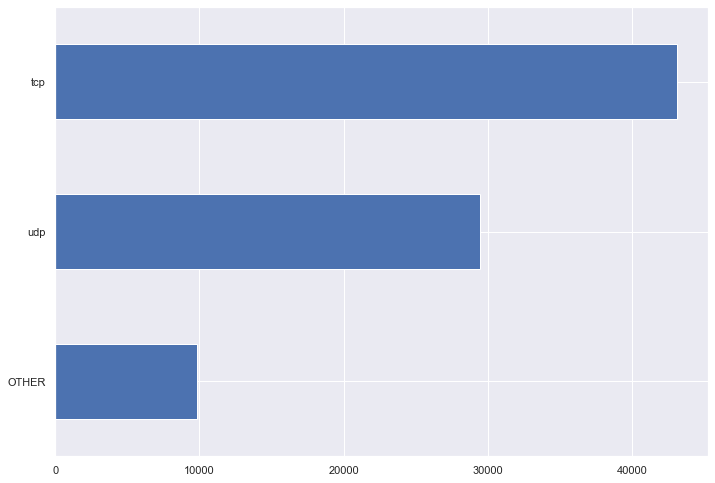

In [48]:
df.select_dtypes(exclude=[np.number])['proto'].value_counts().plot(kind='barh').invert_yaxis()

In [49]:
# aff-service-bar

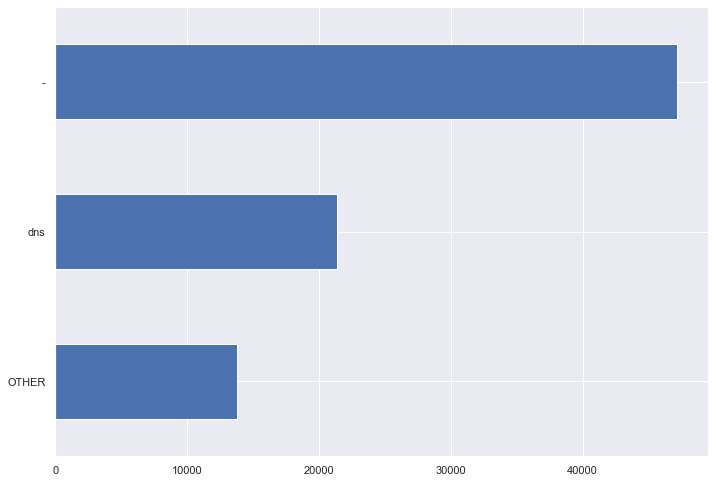

In [50]:
df.select_dtypes(exclude=[np.number])['service'].value_counts().plot(kind='barh').invert_yaxis()

In [51]:
# aff-state-bar

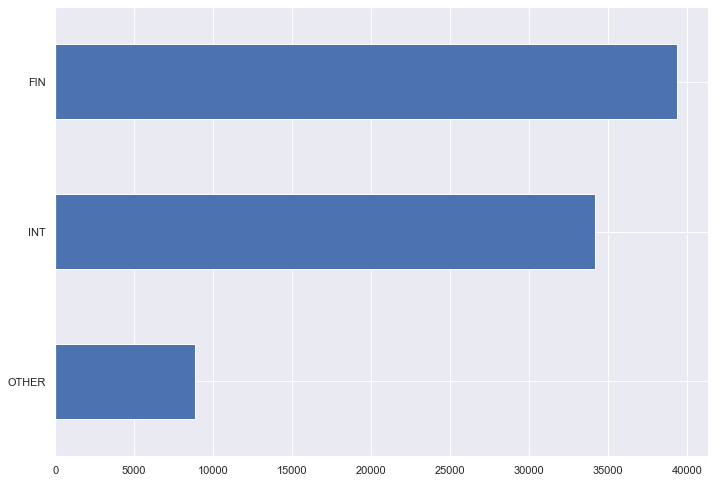

In [52]:
df.select_dtypes(exclude=[np.number])['state'].value_counts().plot(kind='barh').invert_yaxis()

In [53]:
def save_data(df, des=''):
    path = r"UNSW_NB15\preprocessing"
    if not os.listdir(path):
        version = "v1"
    else:
        final = os.listdir(path)[-1]
        version = f"v{int(final[-5])+1}"
    #print(os.listdir(path))
    file = os.path.join(path, f"{des}_{version}")
    file += ".csv"
    #data = np.array(df)
    df.to_csv(file, index=False)
    print(f"Version {version} Data is Saved Successfully in Path: {file}")

In [28]:
save_data(df, 'preprocessing')

Version v3 Data is Saved Successfully in Path: UNSW_NB15\preprocessing\preprocessing_v3.csv


## OneHotEncoder

In [54]:
X_train = df.drop(columns=['label'], axis=1)
y_train = df['label']

In [55]:
old_features = X_train.columns

In [56]:
len(old_features)

42

In [57]:
X_train.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [58]:
transformers = [('encoder', OneHotEncoder(sparse=False), [1,2,3])]
ct = ColumnTransformer(transformers=transformers, remainder='passthrough')

In [59]:
X_train.shape

(82332, 42)

In [60]:
X_train['proto']

0          udp
1          udp
2          udp
3          udp
4          udp
         ...  
82327      udp
82328      tcp
82329    OTHER
82330    OTHER
82331      udp
Name: proto, Length: 82332, dtype: object

In [61]:
X_train = np.array(ct.fit_transform(X_train))
X_train.shape

(82332, 48)

In [62]:
list(range(20))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [63]:
ss = [num for num in range(20) if num%5==0]
ss

[0, 5, 10, 15]

In [64]:
new_features = [f for f in old_features if f not in ['state', 'service', 'proto']]
len(new_features)

39

In [65]:
len(new_features)

39

In [66]:
for label in list(df['state'].value_counts().index):
    new_features.insert(0, f"state={label}")
    
for label in list(df['service'].value_counts().index):
    new_features.insert(0, f"service={label}")
    
for label in list(df['proto'].value_counts().index):
    new_features.insert(0, f"proto={label}")
    
len(new_features)

48

In [67]:
new_features

['proto=OTHER',
 'proto=udp',
 'proto=tcp',
 'service=OTHER',
 'service=dns',
 'service=-',
 'state=OTHER',
 'state=INT',
 'state=FIN',
 'dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [68]:
df_one_hot = pd.DataFrame(X_train, columns=new_features)
df_one_hot.iloc[0].values

array([0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.10000000e-05, 2.00000000e+00, 0.00000000e+00,
       4.96000000e+02, 0.00000000e+00, 9.09090902e+04, 2.54000000e+02,
       0.00000000e+00, 1.80363632e+08, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.10000000e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.48000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 0.00000000e+00])

In [69]:
X_train[0]

array([0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.10000000e-05, 2.00000000e+00, 0.00000000e+00,
       4.96000000e+02, 0.00000000e+00, 9.09090902e+04, 2.54000000e+02,
       0.00000000e+00, 1.80363632e+08, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.10000000e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.48000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 0.00000000e+00])

In [70]:
save_data(df_one_hot,des='one_hot')

Version v4 Data is Saved Successfully in Path: UNSW_NB15\preprocessing\one_hot_v4.csv


# Train a Base Line Model with all Features

"MLP": MLPClassifier(hidden_layer_sizes=[20, 20],
                             activation='relu',
                             solver='adam',
                             batch_size=2048,
                             random_state=RS),

In [71]:
def define_models():
    RS = 32
    estimators = {
        "DecisionTree": DecisionTreeClassifier(random_state=RS),
        "RandomForest" : RandomForestClassifier(random_state=RS, n_jobs=-1),
        "ExtraTrees": ExtraTreesClassifier(random_state=RS,n_jobs=-1),
        "GradientBoosting": GradientBoostingClassifier(random_state=RS),
        "XGBoost": XGBClassifier(random_state=RS, use_label_encoder=False,
                                 n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(random_state=RS),
        "SVC": Pipeline([('scaler', StandardScaler()),
                         ('svc', LinearSVC(random_state=RS))]),
        "LogisticRegression": Pipeline([('scaler', StandardScaler()),
                                        ('lg', LogisticRegression(random_state=RS))]),
        "Lasso": Pipeline([('scaler', StandardScaler()),
                                        ('lasso', SGDClassifier(random_state=RS, penalty='l2'))]),
        "Ridge": Pipeline([('scaler', StandardScaler()),
                                        ('ridge', SGDClassifier(random_state=RS, penalty='l1'))]),
        "ElasticNet": Pipeline([('scaler', StandardScaler()),
                                        ('ElasticNet', SGDClassifier(random_state=RS, penalty="elasticnet"))])
        
    }
    return estimators

In [72]:
def get_avg_scores(scores, scoring_list):
    result = dict()
    val = ['train_', 'test_']
    for score in scoring_list:
        for v in val:
            score_name = v + score
            result[score_name] = np.round(np.mean(scores[score_name], axis=0)*100, 2)    
    return result

In [73]:
def run_cross_validate(X_train, y_train):
    
    estimators = define_models()
    results = dict()
    for name, model in estimators.items():
        scoring = ['accuracy', 'f1', 'roc_auc', 'precision', 'recall']
        scores = cross_validate(model,
                               X_train, y_train,
                               scoring = scoring,
                               cv=5,
                               n_jobs=-1,
                               verbose=3,
                               return_train_score=True,
                               )
        results[name] = get_avg_scores(scores, scoring)
        
    result_df = []
    for model_name, metric_dic in results.items():
        r = [model_name, X_train.shape[1]]
        for metric_name, metric_result in metric_dic.items():
            r.append(metric_result)
        result_df.append(r)

    cols_names = ['Model', 'Number OF Features','Train_acc', 'Test_acc', 
                  'Train_F1', 'Test_F1',
                  'Train_roc_auc', 'Test_roc_auc',
                  'Train_precision', 'Test_precision', 'Train_Recall', 'Test_Recall']
    
    profile = pd.DataFrame(data=result_df, 
                       columns=cols_names)
    profile.index = profile['Model']
    profile.drop(columns=['Model'], axis=1, inplace=True)
    return profile

In [45]:
profile = run_cross_validate(X_train, y_train)
profile

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.5s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.3s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.6s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
Model,,,,,,,,,,,
DecisionTree,48,99.99,93.25,99.99,93.99,100.00,93.10,100.00,93.63,99.99,94.65
RandomForest,48,99.99,95.77,99.99,96.15,100.00,99.32,100.00,96.67,99.99,95.77
ExtraTrees,48,99.99,95.59,99.99,95.98,100.00,99.37,100.00,96.65,99.99,95.46
GradientBoosting,48,96.25,93.72,96.58,94.20,99.44,99.15,96.85,95.34,96.31,93.52
XGBoost,48,99.13,96.33,99.21,96.65,99.96,99.55,99.50,97.04,98.91,96.40
AdaBoost,48,95.23,93.95,95.66,94.58,99.17,98.92,95.89,94.45,95.43,94.96
SVC,48,91.10,87.73,91.93,89.11,97.55,96.55,91.79,89.47,92.10,89.63
LogisticRegression,48,91.50,88.33,92.30,89.62,97.69,96.79,92.19,90.01,92.43,90.07
Lasso,48,91.76,88.11,92.56,89.55,97.59,96.70,92.08,89.59,93.09,90.57


In [46]:
profile.style.background_gradient(cmap='coolwarm') # [2, 2, 2] hot_encoding

,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
Model,,,,,,,,,,,
DecisionTree,48,99.990000,93.250000,99.990000,93.990000,100.000000,93.100000,100.000000,93.630000,99.990000,94.650000
RandomForest,48,99.990000,95.770000,99.990000,96.150000,100.000000,99.320000,100.000000,96.670000,99.990000,95.770000
ExtraTrees,48,99.990000,95.590000,99.990000,95.980000,100.000000,99.370000,100.000000,96.650000,99.990000,95.460000
GradientBoosting,48,96.250000,93.720000,96.580000,94.200000,99.440000,99.150000,96.850000,95.340000,96.310000,93.520000
XGBoost,48,99.130000,96.330000,99.210000,96.650000,99.960000,99.550000,99.500000,97.040000,98.910000,96.400000
AdaBoost,48,95.230000,93.950000,95.660000,94.580000,99.170000,98.920000,95.890000,94.450000,95.430000,94.960000
SVC,48,91.100000,87.730000,91.930000,89.110000,97.550000,96.550000,91.790000,89.470000,92.100000,89.630000
LogisticRegression,48,91.500000,88.330000,92.300000,89.620000,97.690000,96.790000,92.190000,90.010000,92.430000,90.070000
Lasso,48,91.760000,88.110000,92.560000,89.550000,97.590000,96.700000,92.080000,89.590000,93.090000,90.570000


In [2]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler

In [60]:
X_train_scaled = StandardScaler().fit_transform(X_train)

In [65]:
def define_models():
    RS = 32
    estimators_ = [('extra', ExtraTreesClassifier()),
                   ('XGB', XGBClassifier()),
                   ('RF', RandomForestClassifier())]
    estimators = {
        "Stacking Classifier":StackingClassifier(estimators=estimators_,
                                                 cv=5, n_jobs=-1),
    }
    return estimators

In [66]:
profile = run_cross_validate(X_train_scaled, y_train)
profile

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished


,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
Model,,,,,,,,,,,
Stacking Classifier,48,99.99,96.37,99.99,96.68,100.0,99.59,99.99,97.15,99.99,96.35


In [187]:
def define_models():
    RS = 32
    estimators = {
        "DecisionTree": DecisionTreeClassifier(random_state=RS),
        "RandomForest": RandomForestClassifier(random_state=RS, n_jobs=-1),
        "ExtraTrees": ExtraTreesClassifier(random_state=RS,n_jobs=-1),
        "XGBoost": XGBClassifier(random_state=RS, use_label_encoder=False,
                                 n_jobs=-1),
    }
    return estimators

#### Some Models Suffering from Overfitting Problem We will solve this problem after specifying best model and best subset of features

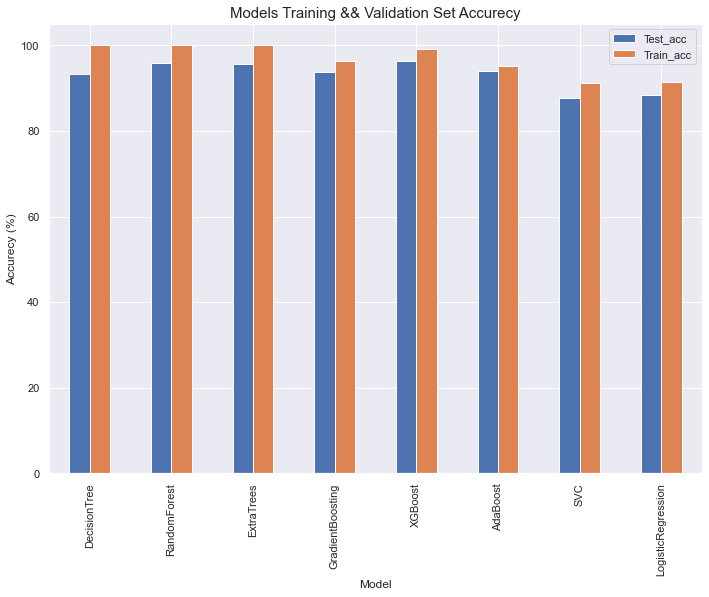

In [168]:
profile[["Test_acc", "Train_acc"]].plot(kind="bar")
plt.title("Models Training && Validation Set Accurecy", fontsize=15)
plt.ylabel("Accurecy (%)")
plt.show()

## Feature Extraction Using Orange Output Rank

In [75]:
X_train = pd.read_csv("UNSW_NB15/preprocessing/one_hot_v2.csv")
X_train.head()

,proto=OTHER,proto=udp,proto=tcp,service=OTHER,service=dns,service=-,state=OTHER,state=INT,state=FIN,dur,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000011,...,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000008,...,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000005,...,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000006,...,2.0,2.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000010,...,2.0,2.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0


In [76]:
X_train.columns

Index(['proto=OTHER', 'proto=udp', 'proto=tcp', 'service=OTHER', 'service=dns',
       'service=-', 'state=OTHER', 'state=INT', 'state=FIN', 'dur', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload',
       'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb',
       'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean',
       'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

##### Read Orange Rank

In [77]:
rank = pd.read_csv("UNSW_NB15/features_rank/rank.csv")
rank = rank.iloc[2:,:]
rank.index = rank.Feature
rank = rank.drop(columns=["Feature"], axis=1).astype('float64')
rank.head(10)

,Info. gain,Gain ratio,χ²,ReliefF
Feature,,,,
proto=OTHER,0.053212,0.100927,4640.198011,0.000000
proto=udp,0.050563,0.053766,3606.138507,0.000000
proto=tcp,0.128472,0.128676,6745.419585,0.000000
service=OTHER,0.000376,0.000577,35.820414,0.000000
service=dns,0.104937,0.127038,8075.868705,0.128000
service=-,0.068922,0.069994,3278.102098,0.128000
state=OTHER,0.098321,0.200018,8759.635800,0.000000
state=INT,0.227604,0.232480,13972.114825,0.000000
state=FIN,0.073852,0.073957,4331.171802,0.000000


In [78]:
X_train.columns == rank.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [79]:
def cross_validate_with_FS(X_train, y_train, scoring_method):
    min_score = rank[scoring_method].quantile(0.10)
    max_score = rank[scoring_method].quantile(0.90)
    ths = np.round(np.linspace(min_score, max_score, num=10), 10)
    first = True
    for th in ths:
        print(f"Cross Validate On Threshold {th}")
        new_fs = rank.index[rank[scoring_method] >= th]
        X_train_ = X_train[new_fs]
        if first:
            S = f"{scoring_method} TH= {th}"
            profile = run_cross_validate(X_train_, y_train)
            profile['Scoring Method'] = S
            profile.index = profile.index + ' ' + scoring_method +' '+ str(len(new_fs))
            first = False
        else:
            p = run_cross_validate(X_train_, y_train)
            S = f"{scoring_method} TH= {th}"
            p['Scoring Method'] = S
            p.index = p.index + ' ' + scoring_method +' '+ str(len(new_fs))
            profile = profile.append(p)
        #profile['Scoring Method'] = scoring_method
    return profile

In [189]:
dfs = {}
for s_m in rank.columns:
    p = cross_validate_with_FS(X_train, y_train, s_m)
    dfs[s_m] = p

Cross Validate On Threshold 0.0106227631


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.6s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.6s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.3s remaining:   43.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.9s finished


Cross Validate On Threshold 0.0364744578


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.6s remaining:   21.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.2s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.6s remaining:   45.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.4s finished


Cross Validate On Threshold 0.0623261525


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.9s remaining:   28.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.9s remaining:   22.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.4s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.1s remaining:   42.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.0s finished


Cross Validate On Threshold 0.0881778472


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.0s remaining:   22.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.2s remaining:   16.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.7s remaining:   41.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.5s finished


Cross Validate On Threshold 0.1140295418


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.3s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.5s remaining:   29.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.2s finished


Cross Validate On Threshold 0.1398812365


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.8s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.0s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.0s remaining:   18.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.1s finished


Cross Validate On Threshold 0.1657329312


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.6s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.8s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.0s remaining:   18.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.1915846259


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.8s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.7s remaining:   10.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.6s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished


Cross Validate On Threshold 0.2174363206


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.6s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.9s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.2s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.2432880153


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.7s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.3s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.3s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.0144283901


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.8s remaining:   23.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.5s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.8s remaining:   49.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.8s finished


Cross Validate On Threshold 0.0332220479


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.9s remaining:   23.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.5s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.2s remaining:   45.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.9s finished


Cross Validate On Threshold 0.0520157057


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.6s remaining:   23.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.9s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.2s remaining:   42.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.7s finished


Cross Validate On Threshold 0.0708093636


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.6s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.0s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.1s remaining:   22.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.5s finished


Cross Validate On Threshold 0.0896030214


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.8s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.2s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.7s remaining:   22.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.1s finished


Cross Validate On Threshold 0.1083966792


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.2s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.7s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.9s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.127190337


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.1s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.5s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.2s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.1459839949


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.0s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.2s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.6s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.1647776527


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.1835713105


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


Cross Validate On Threshold 421.5923050486


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.1s remaining:   21.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.8s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.4s remaining:   45.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.1s finished


Cross Validate On Threshold 2200.1808246721


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.8s remaining:   22.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.6s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.7s remaining:   43.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 3978.7693442957


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.4s remaining:   23.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.9s remaining:   17.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.8s remaining:   49.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.5s finished


Cross Validate On Threshold 5757.3578639193


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.1s remaining:   22.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.7s remaining:   16.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.7s remaining:   40.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.3s finished


Cross Validate On Threshold 7535.9463835428


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.2s remaining:   18.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.5s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.0s remaining:   30.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.8s finished


Cross Validate On Threshold 9314.5349031664


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.3s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.7s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.9s remaining:   25.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.2s finished


Cross Validate On Threshold 11093.12342279


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.5s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.7s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.7s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 12871.7119424135


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.5s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.9s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.7s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 14650.3004620371


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.4s remaining:   14.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.5s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.9s remaining:   13.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.0s finished


Cross Validate On Threshold 16428.8889816607


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.7s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.6s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


Cross Validate On Threshold 0.0


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.6s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.6s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   38.7s remaining:   58.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.4s finished


Cross Validate On Threshold 0.0060731732


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.8s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.1s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.3s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.7s finished


Cross Validate On Threshold 0.0121463463


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.5s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.8s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.2s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.8s finished


Cross Validate On Threshold 0.0182195195


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.1s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.6s remaining:   17.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.0s finished


Cross Validate On Threshold 0.0242926927


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.1s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.8s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.8s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.0303658659


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.5s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.1s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.036439039


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.7s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.1s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.7s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.0425122122


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.5s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.9s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.8s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.0485853854


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.3s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.6s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s finished


Cross Validate On Threshold 0.0546585586


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


In [200]:
dfs.keys()

dict_keys(['Info. gain', 'Gain ratio', 'χ²', 'ReliefF'])

In [240]:
d = pd.DataFrame()
for df in dfs.values():
     d = d.append(df.sort_values(['Test_acc'],axis=0, ascending=False).head(4))

In [241]:
result = d.sort_values(['Test_acc', 'Number OF Features'],axis=0, ascending=False)
result

,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall,Scoring Method
Model,,,,,,,,,,,,
XGBoost χ² 43,43,99.11,96.44,99.19,96.75,99.96,99.57,99.49,97.23,98.89,96.39,χ² TH= 421.5923050486
XGBoost ReliefF 48,48,99.13,96.33,99.21,96.65,99.96,99.55,99.50,97.04,98.91,96.40,ReliefF TH= 0.0
XGBoost Info. gain 43,43,99.13,96.32,99.21,96.64,99.96,99.55,99.51,97.04,98.90,96.38,Info. gain TH= 0.0106227631
XGBoost Gain ratio 43,43,99.13,96.32,99.21,96.64,99.96,99.55,99.51,97.04,98.90,96.38,Gain ratio TH= 0.0144283901
XGBoost Info. gain 40,40,99.05,96.24,99.13,96.57,99.95,99.50,99.47,96.98,98.80,96.29,Info. gain TH= 0.0364744578
RandomForest ReliefF 48,48,99.99,95.77,99.99,96.15,100.00,99.32,100.00,96.67,99.99,95.77,ReliefF TH= 0.0
RandomForest χ² 43,43,99.99,95.73,99.99,96.11,100.00,99.33,100.00,96.62,99.99,95.75,χ² TH= 421.5923050486
RandomForest Info. gain 43,43,99.99,95.72,99.99,96.10,100.00,99.30,100.00,96.62,99.99,95.71,Info. gain TH= 0.0106227631
RandomForest Gain ratio 43,43,99.99,95.72,99.99,96.10,100.00,99.30,100.00,96.62,99.99,95.71,Gain ratio TH= 0.0144283901


In [242]:
result.to_csv("UNSW_NB15/results/feature_extraction.csv")

<AxesSubplot:xlabel='Test_acc', ylabel='Model'>

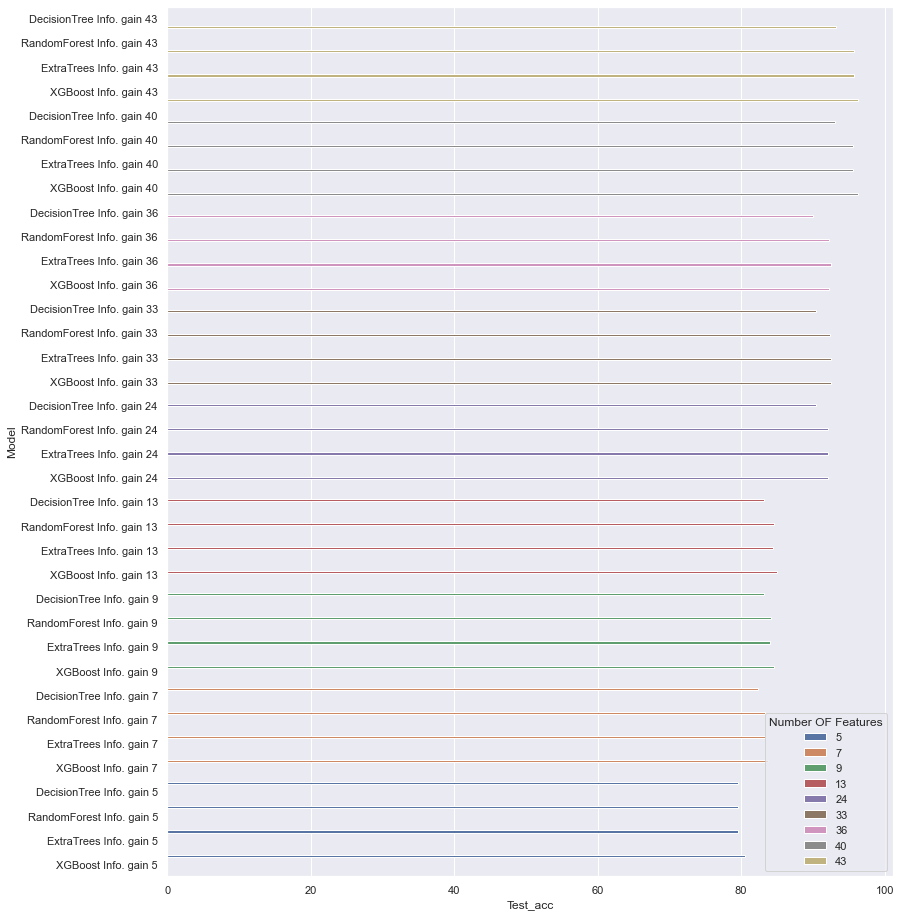

In [193]:
sns.set_theme()
plt.figure(figsize=(13, 16))
sns.barplot(y=df1.index, x=df1['Test_acc'], hue=df1["Number OF Features"], )
#plt.vlines(x=90, ymin='DecisionTree', ymax='LogisticRegression')

## Optimal Models

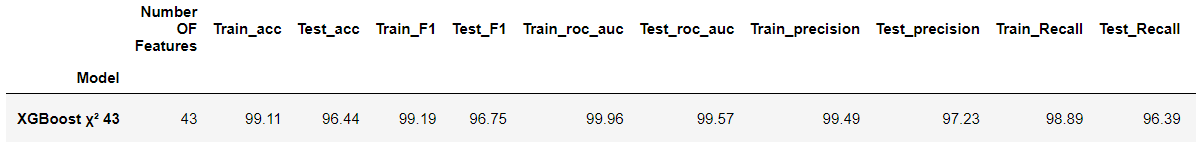

In [80]:
rank.keys()

Index(['Info. gain', 'Gain ratio', 'χ²', 'ReliefF'], dtype='object')

In [72]:
rank['χ²'].sort_values(ascending=False).head(43)

Feature
ct_dst_sport_ltm     35072.337653
dload                24288.423435
dmean                20169.230460
ct_src_dport_ltm     18585.848824
dpkts                16929.551632
dbytes               16214.319274
sloss                14768.513050
state=INT            13972.114825
swin                 13484.365845
spkts                12611.051130
dloss                12396.483639
sttl                 12369.629562
sbytes               11461.173928
dwin                 11157.613018
dtcpb                11008.549956
stcpb                10991.705876
ct_state_ttl         10233.026344
state=OTHER           8759.635800
rate                  8445.012282
sjit                  8273.630577
dinpkt                8252.261103
service=dns           8075.868705
sload                 7684.643932
sinpkt                7610.824084
synack                7069.944186
tcprtt                6818.969524
proto=tcp             6745.419585
dur                   6709.907287
djit                  6692.241665
ackdat

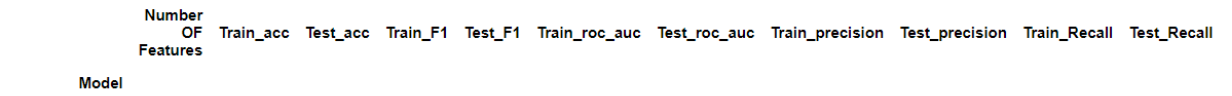

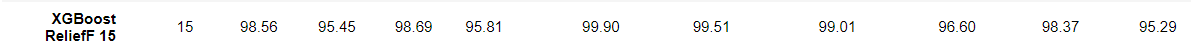

In [81]:
rank['ReliefF'].sort_values(ascending=False).head(15)

Feature
dttl                0.147692
service=dns         0.128000
service=-           0.128000
sttl                0.108235
ct_dst_sport_ltm    0.056973
ct_state_ttl        0.053667
ct_src_ltm          0.050508
smean               0.049118
ct_dst_ltm          0.044621
ct_src_dport_ltm    0.043414
dload               0.043035
ct_srv_src          0.042290
ct_srv_dst          0.041049
dmean               0.037801
ct_dst_src_ltm      0.035290
Name: ReliefF, dtype: float64

In [82]:
features = list(rank['ReliefF'].sort_values(ascending=False).head(15).keys())

### Regularization

In [83]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train[features], y_train,
                                                      test_size=0.2, stratify=y_train,
                                                      random_state=32)

In [84]:
X_train.shape

(65865, 15)

In [85]:
X_valid.shape

(16467, 15)

In [86]:
clf = DecisionTreeClassifier(random_state=32)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

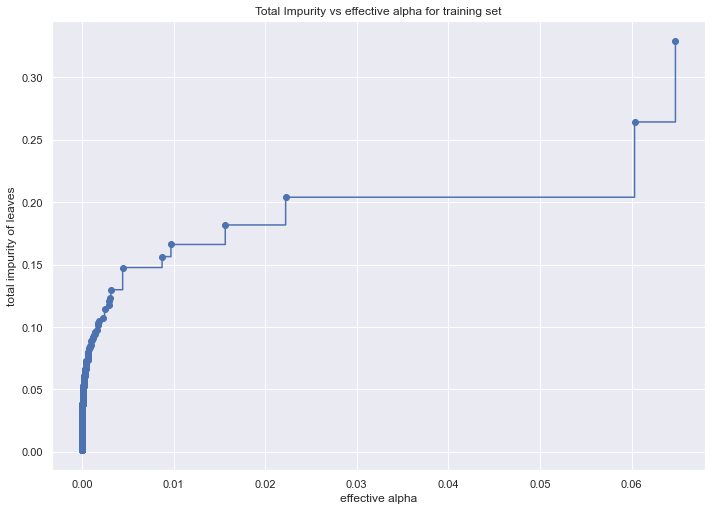

In [87]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [88]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train[features], y_train)
    clfs.append(clf)

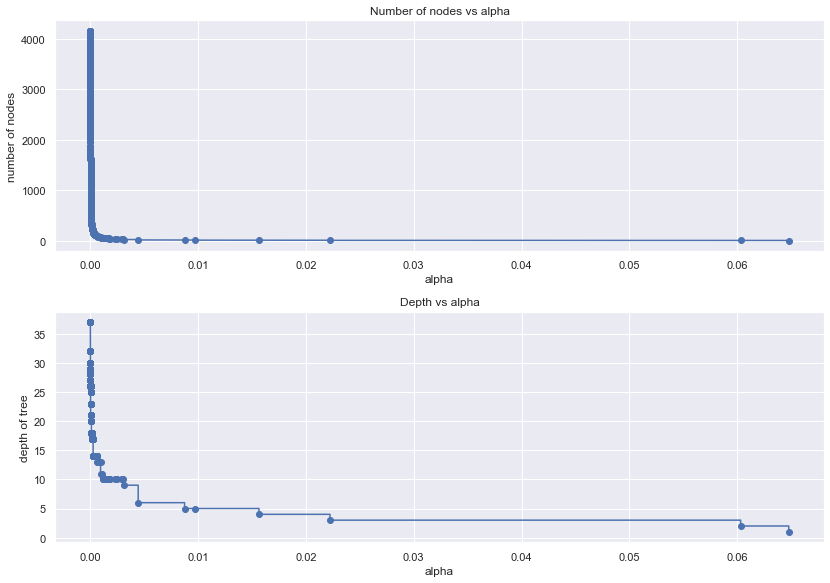

In [89]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

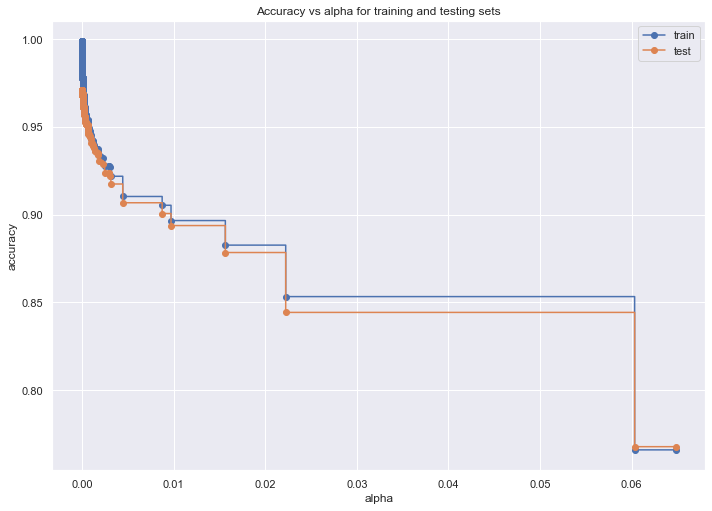

In [90]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [92]:
np.argmax(test_scores)

487

In [276]:
test_scores[487]

0.9712758851035405

In [277]:
train_scores[487]

0.9873073711379337

In [278]:
ccp_alphas[487]

2.4496248055131886e-05

In [288]:
clf = clfs[487]

In [290]:
clf.tree_.max_depth

26

In [291]:
clf.tree_.n_features

15

In [292]:
clf.tree_.n_leaves

757

In [293]:
rf = RandomForestClassifier(ccp_alpha=ccp_alphas[487], random_state=32)
rf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=2.4496248055131886e-05, random_state=32)

In [295]:
rf.score(X_train, y_train)

0.9888863584604873

In [294]:
rf.score(X_valid, y_valid)

0.9763162689014392

In [280]:
xgb = XGBClassifier(ccp_alpha=ccp_alphas[487])
xgb.fit(X_train, y_train)

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:53:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "ccp_alpha" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:53:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree',
              ccp_alpha=2.4496248055131886e-05, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [281]:
xgb.score(X_valid, y_valid)

0.9766806339952633

In [286]:
xgb = XGBClassifier(random_state=32)
xgb.fit(X_train, y_train)

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=32,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [287]:
xgb.score(X_valid, y_valid)

0.9766806339952633

In [5]:
df = pd.read_csv("UNSW_NB15/preprocessing/one_hot_v2.csv")
df.head()

,proto=OTHER,proto=udp,proto=tcp,service=OTHER,service=dns,service=-,state=OTHER,state=INT,state=FIN,dur,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000011,...,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000008,...,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000005,...,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000006,...,2.0,2.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000010,...,2.0,2.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0


In [99]:
df.columns

Index(['proto=OTHER', 'proto=udp', 'proto=tcp', 'service=OTHER', 'service=dns',
       'service=-', 'state=OTHER', 'state=INT', 'state=FIN', 'dur', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload',
       'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb',
       'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean',
       'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [96]:
X_train.shape

(82332, 15)

In [97]:
y_train.shape

(52692,)

In [92]:
features

['dttl',
 'service=dns',
 'service=-',
 'sttl',
 'ct_dst_sport_ltm',
 'ct_state_ttl',
 'ct_src_ltm',
 'smean',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'dload',
 'ct_srv_src',
 'ct_srv_dst',
 'dmean',
 'ct_dst_src_ltm']

In [ ]:
df 

In [10]:
X_train = df[features]
y_train = pd.read_csv("UNSW_NB15/UNSW_NB15_training-set.csv")['label']

In [11]:
X_train_scaled = StandardScaler().fit_transform(X_train)

In [17]:
def define_models():
    RS = 32
    estimators = {
        "DecisionTree":DecisionTreeClassifier(random_state=RS, 
                                              ccp_alpha=ccp_alphas[487]),
        "RandomForest" : RandomForestClassifier(random_state=RS, n_jobs=-1,
                                               ccp_alpha=ccp_alphas[487]),
        "ExtraTrees": ExtraTreesClassifier(random_state=RS,n_jobs=-1,
                                          ccp_alpha=ccp_alphas[487]),
        "XGBoost": XGBClassifier(random_state=RS, use_label_encoder=False,
                                 n_jobs=-1, ccp_alpha=ccp_alphas[487]),
    }
    return estimators

In [20]:
profile = run_cross_validate(X_train
                             , y_train)
profile

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.8s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.1s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.3s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.3s finished


,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
Model,,,,,,,,,,,
DecisionTree,15,99.36,93.81,99.42,94.39,99.95,94.82,99.44,94.68,99.40,94.41
RandomForest,15,99.38,94.73,99.44,95.03,99.98,99.45,99.54,96.41,99.35,94.18
ExtraTrees,15,98.65,92.66,98.77,92.63,99.91,99.45,98.89,95.98,98.66,90.94
XGBoost,15,98.56,95.45,98.69,95.81,99.90,99.51,99.01,96.60,98.37,95.29


In [21]:
X_train.shape

(82332, 15)

In [22]:
X_train_scaled = StandardScaler().fit_transform(X_train)

## Stacking with Logistic Regression

In [23]:
def define_models():
    RS = 32
    estimators_ = [('extra', ExtraTreesClassifier(ccp_alpha=ccp_alphas[487])),
                   ('XGB', XGBClassifier(ccp_alpha=ccp_alphas[487])),
                   ('RF', RandomForestClassifier(ccp_alpha=ccp_alphas[487]))]
    estimators = {
        "Stacking Classifier":StackingClassifier(estimators=estimators_,
                                                 cv=5, n_jobs=-1),
    }
    return estimators

In [24]:
profile = run_cross_validate(X_train_scaled, y_train)
profile

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
Model,,,,,,,,,,,
Stacking Classifier,15,98.88,95.04,98.98,95.31,99.94,99.58,99.16,96.68,98.8,94.45


In [93]:
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, auc

In [104]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train[features], y_train,
                                                      test_size=0.2, stratify=y_train,
                                                      random_state=32)

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [109]:
RS = 32
estimators_ = [('extra', ExtraTreesClassifier(ccp_alpha=ccp_alphas[487])),
               ('XGB', XGBClassifier(ccp_alpha=ccp_alphas[487])),
               ('RF', RandomForestClassifier(ccp_alpha=ccp_alphas[487]))]
tree = DecisionTreeClassifier(random_state=RS, ccp_alpha=ccp_alphas[487])
rf = RandomForestClassifier(random_state=RS, n_jobs=-1,ccp_alpha=ccp_alphas[487])
extree = ExtraTreesClassifier(random_state=RS,n_jobs=-1,ccp_alpha=ccp_alphas[487])
xgb = XGBClassifier(random_state=RS, use_label_encoder=False,
            n_jobs=-1, ccp_alpha=ccp_alphas[487])
st1 = StackingClassifier(estimators=estimators_, cv=5, n_jobs=-1)

st2 = StackingClassifier(estimators=estimators_,
                cv=5, n_jobs=-1,
                final_estimator=MLPClassifier(hidden_layer_sizes=[20,20]))

st3 = StackingClassifier(estimators=estimators_,cv=5, n_jobs=-1,
            final_estimator=MLPClassifier(hidden_layer_sizes=[15,15,20, 20,20]))

In [110]:
tree.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
extree.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
st1.fit(X_train_scaled, y_train)
st2.fit(X_train_scaled, y_train)
st3.fit(X_train_scaled, y_train)

[03:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "ccp_alpha" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('extra',
                                ExtraTreesClassifier(ccp_alpha=2.4496248055131886e-05)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              ccp_alpha=2.4496248055131886e-05,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              l...
                                              n_estimators=100, n_jobs=None,
                          

In [111]:
y_pred_tree = tree.predict(X_valid_scaled)
y_pred_rf = rf.predict(X_valid_scaled)
y_pred_xgb = xgb.predict(X_valid_scaled)
y_pred_extree = extree.predict(X_valid_scaled)
y_pred1 = st1.predict(X_valid_scaled)
y_pred2 = st2.predict(X_valid_scaled)
y_pred3 = st3.predict(X_valid_scaled)

In [104]:
accuracy_score(y_valid, y_pred2)

0.9766806339952633

In [114]:
fpr_tree, tpr_tree, th_tree = roc_curve(y_true=y_valid, y_score=y_pred_tree)
fpr_rf, tpr_rf, th = roc_curve(y_true=y_valid, y_score=y_pred_rf)
fpr_xgb, tpr_xgb, th = roc_curve(y_true=y_valid, y_score=y_pred_xgb)
fpr_extree, tpr_extree, th3 = roc_curve(y_true=y_valid, y_score=y_pred_extree)
fpr1, tpr1, th1 = roc_curve(y_true=y_valid, y_score=y_pred1)
fpr2, tpr2, th2 = roc_curve(y_true=y_valid, y_score=y_pred2)
fpr3, tpr3, th3 = roc_curve(y_true=y_valid, y_score=y_pred3)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc_tree = auc(fpr_tree, tpr_tree)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_extree = auc(fpr_extree, tpr_extree)

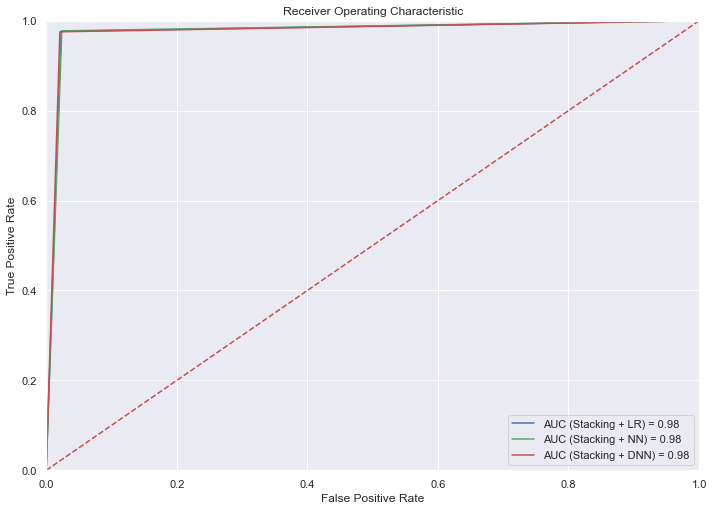

In [116]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC (Stacking + LR) = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC (Stacking + NN) = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'r', label = 'AUC (Stacking + DNN) = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
RocCurveDisplay(fpr, tpr)

TypeError: __init__() takes 1 positional argument but 3 were given

## Stacking with MLP

In [25]:
def define_models():
    RS = 32
    estimators_ = [('extra', ExtraTreesClassifier(ccp_alpha=ccp_alphas[487])),
                   ('XGB', XGBClassifier(ccp_alpha=ccp_alphas[487])),
                   ('RF', RandomForestClassifier(ccp_alpha=ccp_alphas[487]))]
    estimators = {
        "Stacking Classifier":StackingClassifier(estimators=estimators_,
                                                 cv=5, n_jobs=-1,
                                                 final_estimator=MLPClassifier(hidden_layer_sizes=[20,20])),
    }
    return estimators

In [26]:
profile = run_cross_validate(X_train_scaled, y_train)
profile

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.8min finished


,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
Model,,,,,,,,,,,
Stacking Classifier,15,98.7,95.28,98.81,95.48,99.92,99.51,99.47,97.85,98.16,93.57


## Stacking with Deeper MLP

In [88]:
def define_models():
    RS = 32
    estimators_ = [('extra', ExtraTreesClassifier(ccp_alpha=ccp_alphas[487])),
                   ('XGB', XGBClassifier(ccp_alpha=ccp_alphas[487])),
                   ('RF', RandomForestClassifier(ccp_alpha=ccp_alphas[487]))]
    estimators = {
        "Stacking Classifier":StackingClassifier(estimators=estimators_,
                                                 cv=5, n_jobs=-1,
                                                 final_estimator=MLPClassifier(hidden_layer_sizes=[15,15,20, 20,20])),
    }
    return estimators

In [89]:
profile = run_cross_validate(X_train_scaled, y_train)
profile

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
Model,,,,,,,,,,,
Stacking Classifier,15,98.84,97.82,98.94,98.02,99.94,99.77,99.26,98.4,98.63,97.64
